# Kernel Density Estimation

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data

In [2]:
data = data.frame(x1=c(2.5, 2.0, 2.0, 2.1, 8.0, 2.0, 10.0, 10.5, 3.0, 2.5, 3.0, 8.0, 1.0, 1.5),
                  x2=c(5.0, 5.0, 5.0, 4.0, 4.0, 5.5,  6.0,  3.0, 6.0, 6.0, 6.1, 6.0, 1.0, 6.0))
data

x1,x2
2.5,5.0
2.0,5.0
2.0,5.0
2.1,4.0
8.0,4.0
2.0,5.5
10.0,6.0
10.5,3.0
3.0,6.0
2.5,6.0


## Exercise 1

Estimate density of x1 distribution.

Plot the estimated density of the x1 distribution, using a Gaussian kernel at bandwidth 1, scaled horizontally 0 to 10.  

You may want to use these function(s):

* geom_density()

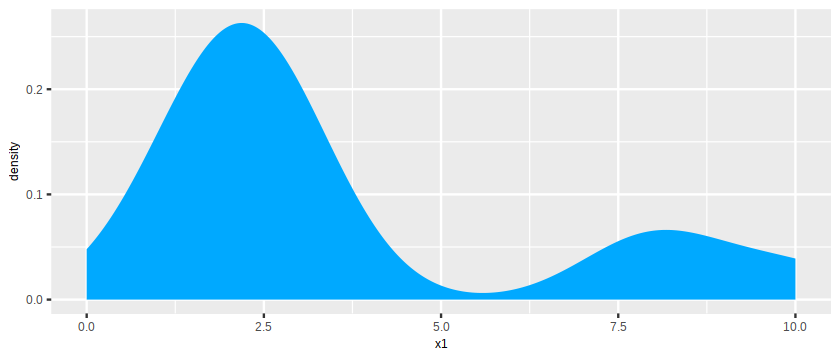

In [3]:
# The reason this warning shows up at all times is because there is a value 10.5 for x1
ggplot(data) + xlim(0,10) +
geom_density(aes(x1), kernel="gaussian", bw=1, na.rm=TRUE)

## Exercise 2 

Compare density estimates of the x1 variable distribution at various bandwidths.  

Plot the estimated densities of the x1 variable distribution, using a Gaussian kernel at bandwidths 2, 1, 0.5, and 0.2, overlayed and color-coded by bandwidth, scaled horizontally 0 to 10.

You may want to use these function(s):
* geom_density()

Use `geom_density(........, alpha=0.3))` to make the fill transparent. 

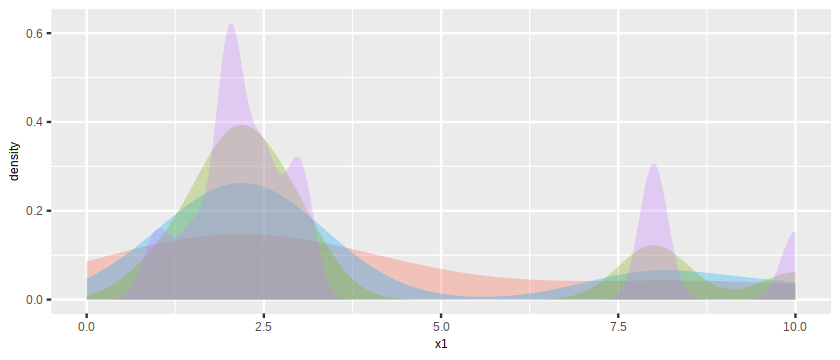

In [4]:
ggplot(data) + xlim(0,10) +
geom_density(aes(x1), kernel="gaussian", bw=2, fill=PALETTE[2], alpha=0.3, na.rm=TRUE) +
geom_density(aes(x1), kernel="gaussian", bw=1, fill=PALETTE[1], alpha=0.3, na.rm=TRUE) + 
geom_density(aes(x1), kernel="gaussian", bw=0.5, fill=PALETTE[3], alpha=0.3, na.rm=TRUE) +
geom_density(aes(x1), kernel="gaussian", bw=0.2, fill=PALETTE[4], alpha=0.3, na.rm=TRUE)

## Exercise 3

Plot the estimated density of x1 and x2 distributions taken together, using a Gaussian kernel at bandwidths 100, 10, 5, and 1, scaled horizontally and vertically 0 to 10, one plot for each bandwidth.  Show the original observations upon which the density is estimated.

You may want to use these function(s):
* geom_polygon()
* geom_density_2d()
* scale_fill_continuous()
* geom_point()


Use `geom_polygon(aes(.........., fill=stat(level), alpha=stat(level), .........., stat="density2d")` to fill.<br>
Use `scale_fill_continuous(low="yellow", high="red")` to make the fill span from yellow to red.

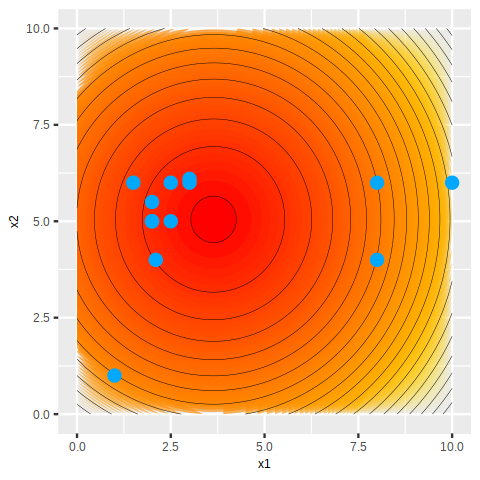

In [5]:
output_size(4,4)

ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_polygon(aes(x=x1, y=x2, fill=stat(level), alpha=stat(level)), h=c(100, 100), n=500, bins=100, 
             stat="density2d", na.rm=TRUE) + # h sets the x- and y- bandwidths
geom_density_2d(aes(x=x1, y=x2), h=c(100, 100), n=500, bins=20, na.rm=TRUE) +
geom_point(aes(x=x1, y=x2), na.rm=TRUE) +
scale_fill_continuous(low="yellow", high="red") +
theme.no_legend

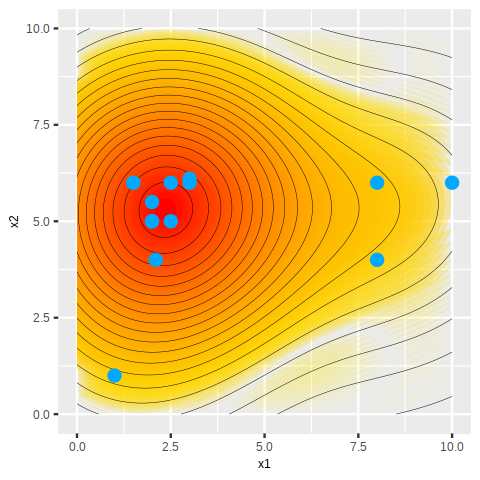

In [6]:
ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_polygon(aes(x=x1, y=x2, fill=stat(level), alpha=stat(level)), h=c(10, 10), n=500, bins=100, 
             stat="density2d", na.rm=TRUE) + # h sets the x- and y- bandwidths
geom_density_2d(aes(x=x1, y=x2), h=c(10, 10), n=500, bins=20, na.rm=TRUE) +
geom_point(aes(x=x1, y=x2), na.rm=TRUE) +
scale_fill_continuous(low="yellow", high="red") +
theme.no_legend

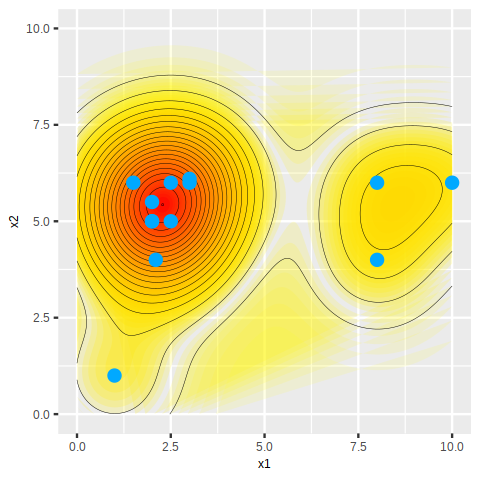

In [7]:
ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_polygon(aes(x=x1, y=x2, fill=stat(level), alpha=stat(level)), h=c(5, 5), n=500, bins=100, 
             stat="density2d", na.rm=TRUE) + # h sets the x- and y- bandwidths
geom_density_2d(aes(x=x1, y=x2), h=c(5, 5), n=500, bins=20, na.rm=TRUE) +
geom_point(aes(x=x1, y=x2), na.rm=TRUE) +
scale_fill_continuous(low="yellow", high="red") +
theme.no_legend

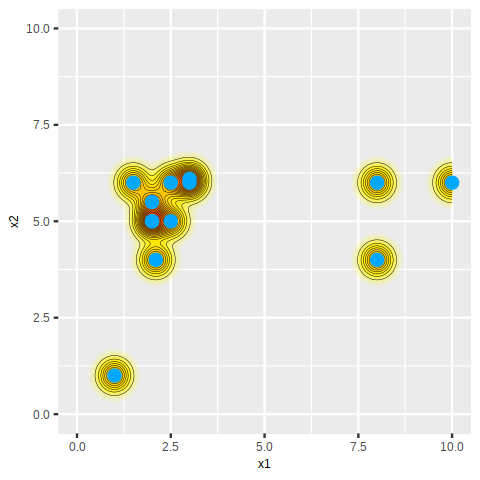

In [8]:
ggplot(data) + xlim(0,10) + ylim(0,10) +
geom_polygon(aes(x=x1, y=x2, fill=stat(level), alpha=stat(level)), h=c(1, 1), n=500, bins=100, 
             stat="density2d", na.rm=TRUE) + # h sets the x- and y- bandwidths
geom_density_2d(aes(x=x1, y=x2), h=c(1, 1), n=500, bins=20, na.rm=TRUE) +
geom_point(aes(x=x1, y=x2), na.rm=TRUE) +
scale_fill_continuous(low="yellow", high="red") +
theme.no_legend

## Exercise 4

Determine the probability that a new observation will measure 1 < x1 < 3. Base the probability on a kernel density estimate using Gaussian kernel, standard deviation 1, estimated over the range 0 to 10.  Set calculation resolution to 500.

You may want to use these function(s):
* density()
* approxfun()
* integrate()

Use `density(......., n=500)` to set calculation resolution to 500.
Use `integrate(........)$value` to get the value of the integration.

In [9]:
d = density(data$x1, kernel="gaussian", bw=1, from=0, to=10, n=500)
pdf = approxfun(d)
fmt(integrate(pdf, 1, 3)$value, "probability_x1_is_1_to_3")

probability_x1_is_1_to_3
0.431128


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised Februray 9, 2020
</span>
</p>
</font>